In [79]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.artist as art
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [80]:
def color_value(y):
    color =['']*4
    for i in [0,1,2,3]:
        if y < CTEs.iloc[i]-error[i]:
            color[i] ='blue'
        elif y > CTEs.iloc[i]+ error[i]:
            color[i] ='red'
        else:
            color[i] ='white'
    return color

<IPython.core.display.Javascript object>


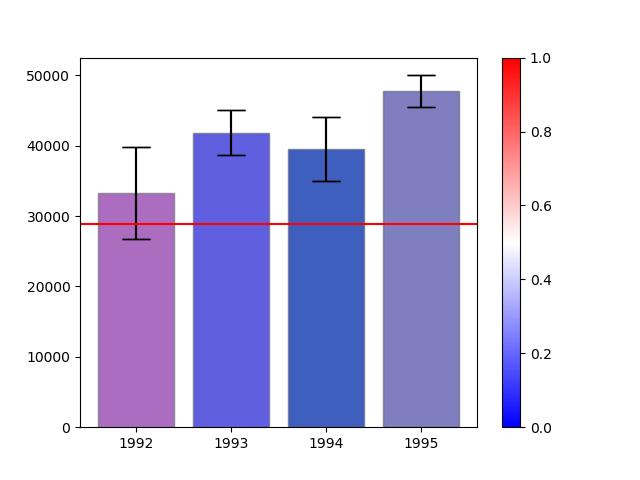

([<matplotlib.axis.XTick at 0x21d42f0d710>,
 <a list of 4 Text xticklabel objects>)

In [81]:
CTEs = df.mean(axis=1)
error = st.sem(df.T)*st.norm.ppf(.975) #sampling distribution: standard err = std/sqrt(n) same as sem()
years = list(df.index)
ax = plt.bar(years,CTEs, yerr= error, align ='center', edgecolor ='gray',color =['red','gray','green','yellow'],alpha =0.5, ecolor='black',capsize =10)
plt.xticks(years, years)
#y = 42000
#ay = plt.axhline(y, color='r', linestyle='-',label ='42000')

In [82]:
def onclick(event):
    global ydata
    ax
    ydata = event.ydata
   # tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

In [83]:
score = [(ydata-value[0])/value[1] for i, value in enumerate(list(zip(CTEs, st.sem(df.T))))]
pvalue = [st.norm.sf(abs(s))*2 for i, s in enumerate(score)]

startcolor = '#0000ff'   
midcolor = '#ffffff'     
endcolor = '#ff0000'         
cmap2 = col.LinearSegmentedColormap.from_list('own2',[startcolor,midcolor,endcolor])

cm.register_cmap(cmap=cmap2)
cmap = cm.get_cmap('own2')
cpick = cm.ScalarMappable(cmap=cmap, norm=col.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])
cbar = plt.colorbar(cpick, orientation="vertical")

In [84]:
plt.bar(years,CTEs, yerr= error, align ='center', edgecolor ='gray',color = cpick.to_rgba(pvalue),alpha =0.5, ecolor='black',capsize =10)
plt.axhline(ydata, color='r', linestyle='-')

plt.savefig(r'C:\Couresa\Specializations\Applied Data Science with Python\2-Applied plotting charting and data representation in python\Ferreira.png')